In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/saver/OneDrive/Desktop/project/SciVis/Dataset/languages.csv')
df.head()

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
2,c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,...,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
4,sql,SQL,NaN,queryLanguage,1974,Donald D. Chamberlin and Raymond F. Boyce,NaN,NaN,NaN,NaN,...,False,True,--,2022,7179119,219617,IBM,0.0,text,NaN


In [3]:
type_freq = pd.crosstab(index = df['type'],
                        columns = ['abs_freq'],
                        colnames = [''],
                        normalize= True)
type_freq

,abs_freq
type,
assembly,0.010458
barCodeFormat,0.002092
bytecode,0.001394
configFormat,0.001859
contractLanguage,0.001627
dataNotation,0.015803
dataValidationLanguage,0.001394
database,0.008134
diffFormat,0.000697


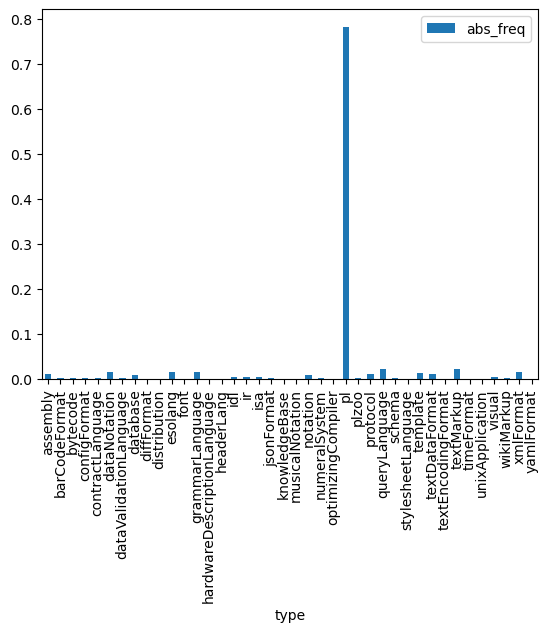

In [4]:
type_freq.plot.bar()
plt.show()

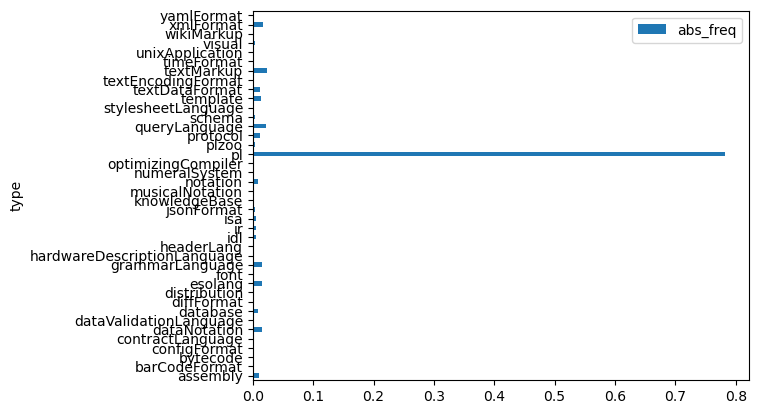

In [5]:
type_freq.plot.barh(rot = 0)
plt.show()

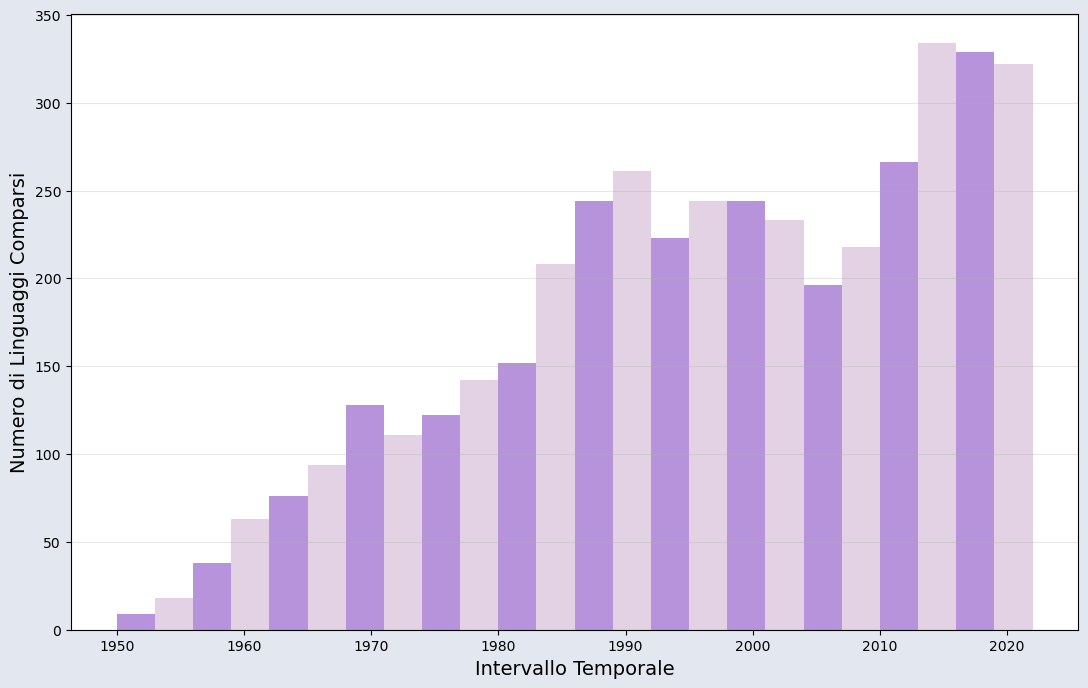

In [6]:
bins = np.arange(1950,2023,3)
col = list()
for i in range (len(bins)):
    if i % 2 == 0:
        col.append('#9966CC')
    else:
        col.append('#D8BFD8')
fig = plt.figure(figsize = (13,8))
fig.set_facecolor('#E3E7F0')
n,bins, patches = plt.hist(df.appeared, bins = bins, alpha = 0.7)
for patch, colore in zip(patches,col):
    patch.set_facecolor(colore)
plt.xlabel('Intervallo Temporale', fontsize = 14)
plt.ylabel('Numero di Linguaggi Comparsi', fontsize = 14)
plt.grid(alpha = 0.3, axis = 'y')
plt.show()

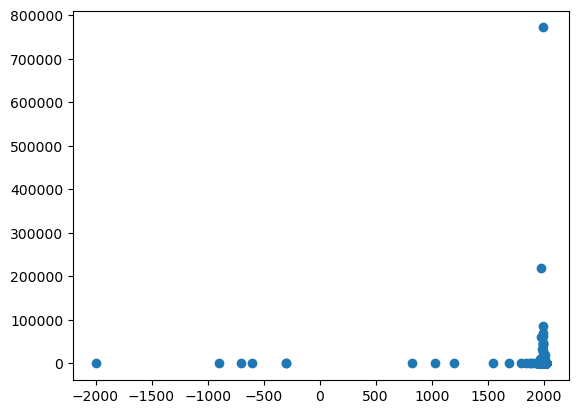

-0.0008390455155456993

In [7]:
plt.scatter(df['appeared'], df['number_of_jobs'])
plt.show()
df['number_of_jobs'].corr(df['appeared'])

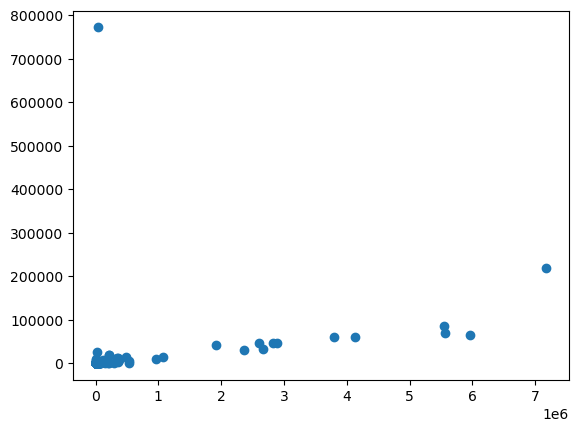

0.3240277557361062

In [8]:
plt.scatter(df['number_of_users'], df['number_of_jobs'])
plt.show()
df['number_of_jobs'].corr(df['number_of_users'])

In [9]:
ind = pd.crosstab(index = df['features_has_semantic_indentation'],
                        columns = ['freq'],
                        colnames = ['']
                        )
ind

,freq
features_has_semantic_indentation,
False,516
True,65


In [10]:
comments = pd.crosstab(index = df['features_has_line_comments'],
                        columns = ['abs_freq'],
                        colnames = ['']
                        )
comments

,abs_freq
features_has_line_comments,
False,21
True,517


In [11]:
comments = pd.crosstab(index = df['line_comment_token'].dropna(),
                        columns = ['abs_freq'],
                        colnames = ['Valore']
                        )
comments

Valore,abs_freq
line_comment_token,
!,7
#,101
%,15
',17
*,5
*>,1
-#,1
--,42
---,1


In [12]:
df.describe()

,appeared,domain_name_registered,isbndb,book_count,semantic_scholar,language_rank,github_repo_stars,github_repo_forks,github_repo_updated,github_repo_subscribers,...,wikipedia_daily_page_views,wikipedia_backlinks_count,wikipedia_page_id,wikipedia_appeared,wikipedia_created,wikipedia_revision_count,last_activity,number_of_users,number_of_jobs,central_package_repository_count
count,4303.000000,502.000000,1086.000000,4303.000000,758.000000,4303.000000,889.000000,886.000000,885.000000,885.000000,...,1466.000000,1426.000000,1.410000e+03,1345.000000,1263.000000,1173.000000,4303.000000,4.303000e+03,4303.000000,2821.0
mean,1991.105275,2011.332669,7.706262,2.079479,3.794195,2151.000000,2127.402700,261.286682,2021.389831,62.342373,...,227.133015,318.548387,9.167847e+06,1991.144238,2005.748219,330.431373,2000.616082,1.377126e+04,422.183825,0.0
std,111.443382,7.021132,33.164209,17.344654,8.316231,1242.313433,7554.016422,1203.002760,1.763285,200.882012,...,783.552400,1635.289188,1.350683e+07,17.026503,3.768240,813.255594,84.597760,2.277129e+05,12572.985441,0.0
min,-2000.000000,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,0.000000,...,-1.000000,1.000000,9.280000e+02,1830.000000,2001.000000,1.000000,-900.000000,0.000000e+00,0.000000,0.0
25%,1984.000000,2007.000000,0.000000,0.000000,0.000000,1075.500000,29.000000,2.250000,2022.000000,4.000000,...,9.000000,13.000000,3.751538e+05,1980.000000,2003.000000,35.000000,1992.000000,0.000000e+00,0.000000,0.0
50%,1997.000000,2013.000000,0.000000,0.000000,0.000000,2151.000000,194.000000,16.000000,2022.000000,13.000000,...,24.000000,39.000000,2.114700e+06,1994.000000,2005.000000,84.000000,2006.000000,2.000000e+01,0.000000,0.0
75%,2012.000000,2017.000000,2.000000,0.000000,3.000000,3226.500000,1071.000000,91.500000,2022.000000,44.000000,...,99.000000,126.000000,1.232122e+07,2005.000000,2007.000000,242.000000,2021.000000,2.300000e+02,0.000000,0.0
max,2023.000000,2023.000000,400.000000,401.000000,52.000000,4302.000000,88526.000000,23732.000000,2023.000000,2910.000000,...,13394.000000,34348.000000,6.306355e+07,2019.000000,2020.000000,10104.000000,2023.000000,7.179119e+06,771996.000000,0.0


In [13]:
top_10_users = df[['title', 'number_of_users']].groupby('title').sum()
top_10_users = top_10_users.nlargest(10, 'number_of_users')
top_10_users

,number_of_users
title,
SQL,7179119
JavaScript,5962666
HTML,5570873
Java,5550123
C++,4128238
C,3793768
CSS,2881846
Python,2818037
MATLAB,2661579


In [14]:
d = df['number_of_users'].dropna()
len(d)


4303

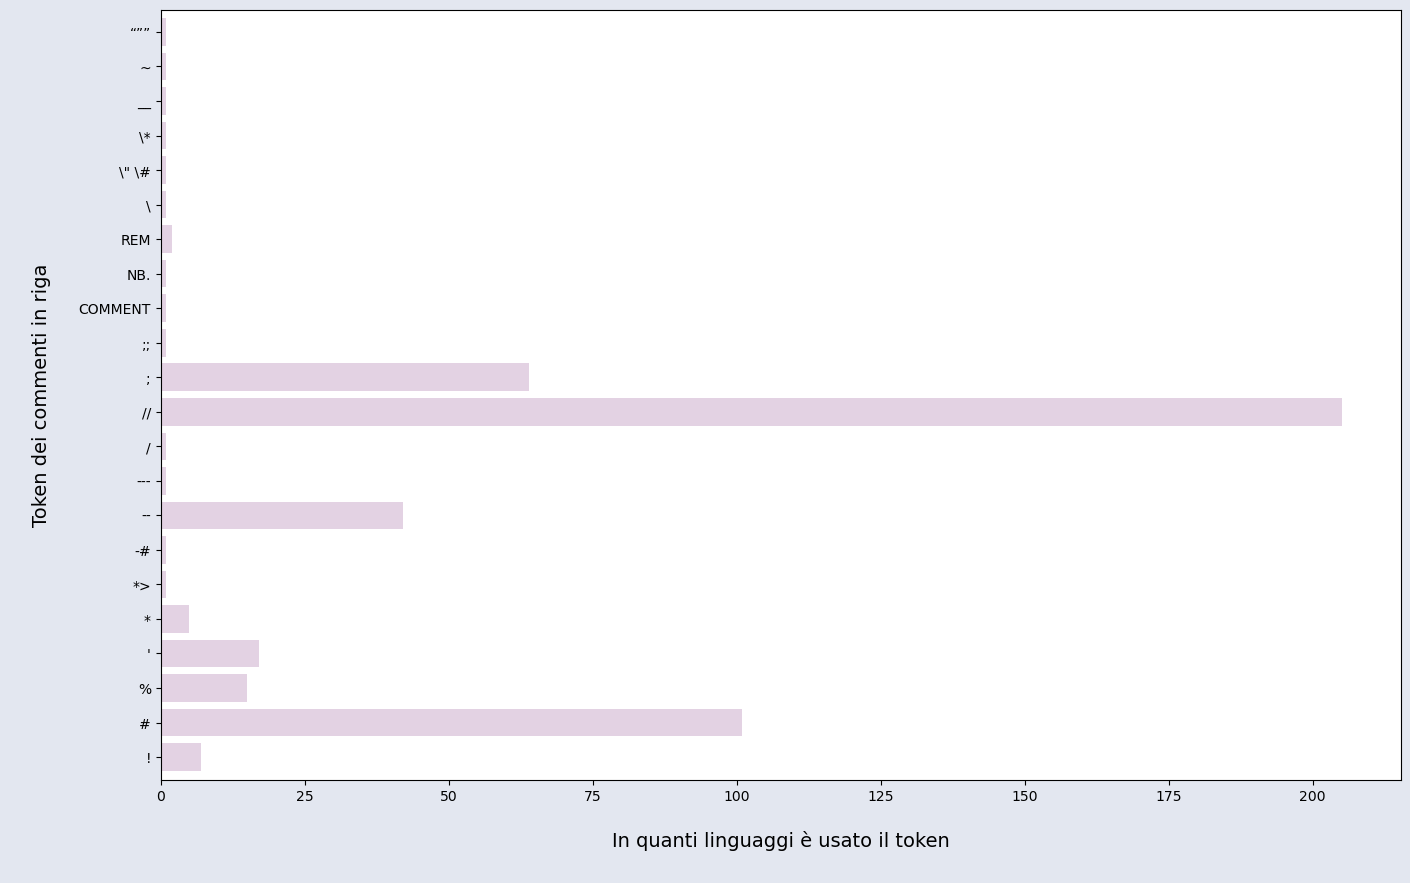

In [71]:
comments =comments[comments.index != '⍝']
fig, ax = plt.subplots(figsize=(16, 10))
fig.set_facecolor('#E3E7F0')
comments.plot.barh(ax=ax, legend=False, color ='#D8BFD8', width = 0.8, alpha = 0.7 )
plt.ylabel('\nToken dei commenti in riga\n', fontsize = 14 )
plt.xlabel('\nIn quanti linguaggi è usato il token\n', fontsize = 14)
plt.show()

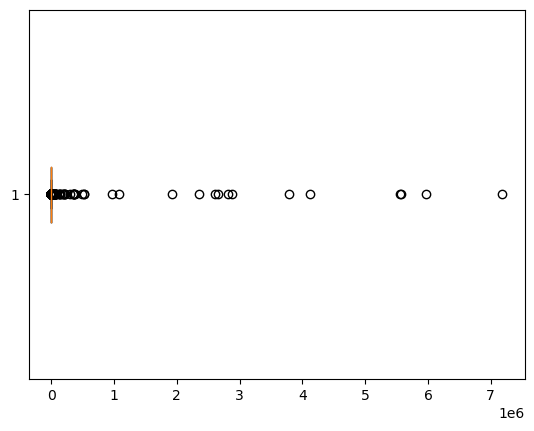

In [16]:
plt.boxplot(df['number_of_users'].dropna(), vert = False)
plt.show()

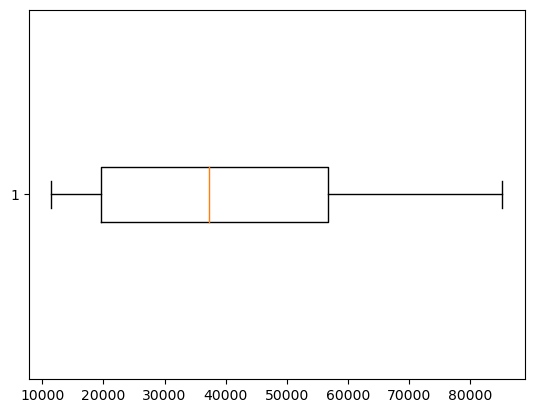

In [17]:

j = [i for i in df['number_of_jobs'] if i > 10000 and i < 200000]
j = pd.Series(j)
plt.boxplot(j, vert = False, )
plt.show()

In [18]:
j.mean()

39020.833333333336

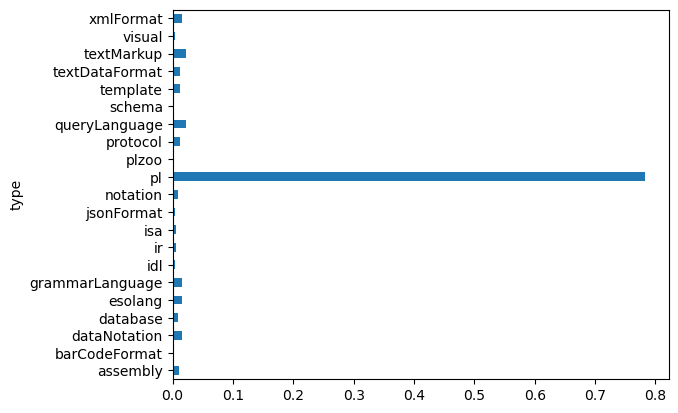

In [19]:
t = type_freq.where(type_freq > 0.002).dropna()
t.plot.barh(rot = 0, legend = False)
plt.show()

In [20]:
pl = df[df['type'] == 'pl']
pl

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
2,c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,...,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
5,cpp,C++,NaN,pl,1985,Bjarne Stroustrup,http://isocpp.org/,isocpp.org,2012.0,NaN,...,NaN,NaN,//,2022,4128238,61098,Bell Labs,0.0,text,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4297,voxml,VoxML,NaN,pl,1998,NaN,NaN,NaN,NaN,https://www.acronymfinder.com/Voice-Markup-Lan...,...,NaN,NaN,NaN,1998,0,0,NaN,0.0,NaN,NaN
4298,vtl,Very Tiny Language,VTL-2 is the second Very Tiny Language develop...,pl,1976,Garry Shannon and Frank McCoy,NaN,NaN,NaN,http://www.altair680kit.com/manuals/Altair_680...,...,NaN,NaN,NaN,1976,0,0,NaN,0.0,NaN,NaN
4299,wizml,wizml,WIZML is a sublanguage of VTML. It is a tag-ba...,pl,1997,NaN,NaN,NaN,NaN,https://sites.hks.harvard.edu/research/Macrome...,...,NaN,NaN,NaN,1997,0,0,NaN,0.0,NaN,NaN
4300,wolontis-bell-interpreter,Wolontis-Bell Interpreter,NaN,pl,1955,NaN,NaN,NaN,NaN,https://semanticscholar.org/paper/8258aed6f523...,...,NaN,NaN,NaN,1955,0,0,NaN,0.0,NaN,NaN


In [21]:
pl_fr = pd.crosstab(index = df['type'],
                    columns = df['appeared'],
                    colnames = [''])
pl_fr

,-2000,-900,-700,-600,-300,825,1033,1202,1544,1689,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
type,,,,,,,,,,,,,,,,,,,,,
assembly,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,1,0,0,0,0
barCodeFormat,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
bytecode,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
configFormat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
contractLanguage,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,2,2,0,0,0,0
dataNotation,0,0,0,0,0,0,0,0,0,0,...,8,2,2,6,4,3,2,1,3,0
dataValidationLanguage,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
database,0,0,0,0,0,0,0,0,0,0,...,1,2,2,3,1,0,0,0,0,0
diffFormat,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


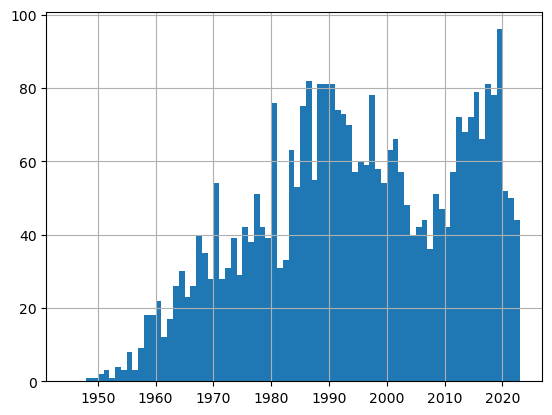

In [22]:
bins = np.arange(1945, 2024, 1)
pl['appeared'].hist(bins = bins)
plt.show()

In [23]:
pl['type'].value_counts()

type
pl    3368
Name: count, dtype: int64

In [24]:
repo = pd.read_csv('C:/Users/saver/OneDrive/Desktop/project/SciVis/Dataset/repos.csv', index_col = 0)
repo.head(20)

,num_repos
language,
JavaScript,1100421
CSS,813443
HTML,779549
Shell,638068
Python,548870
Ruby,374802
Java,369282
PHP,339901
C,292000


In [25]:
r = repo[repo['num_repos']> 42371]

r

,num_repos
language,
JavaScript,1100421
CSS,813443
HTML,779549
Shell,638068
Python,548870
Ruby,374802
Java,369282
PHP,339901
C,292000


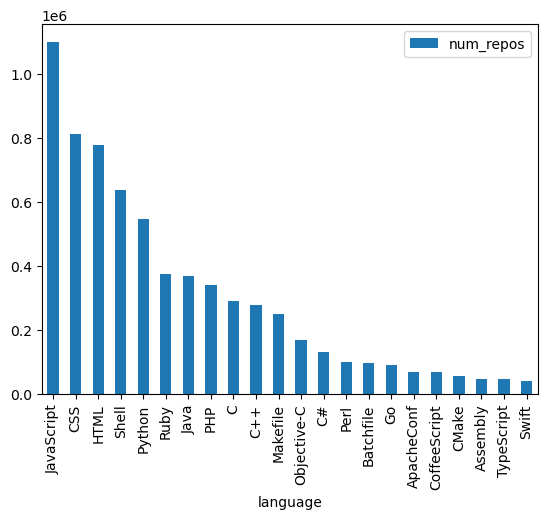

In [26]:
r.plot.bar()
plt.show()

In [27]:
r['num_repos'] = r['num_repos'] / r['num_repos'].sum()
r

C:\Users\saver\AppData\Local\Temp\ipykernel_16492\1804621300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['num_repos'] = r['num_repos'] / r['num_repos'].sum()


,num_repos
language,
JavaScript,0.164124
CSS,0.121322
HTML,0.116267
Shell,0.095166
Python,0.081862
Ruby,0.055900
Java,0.055077
PHP,0.050695
C,0.043551


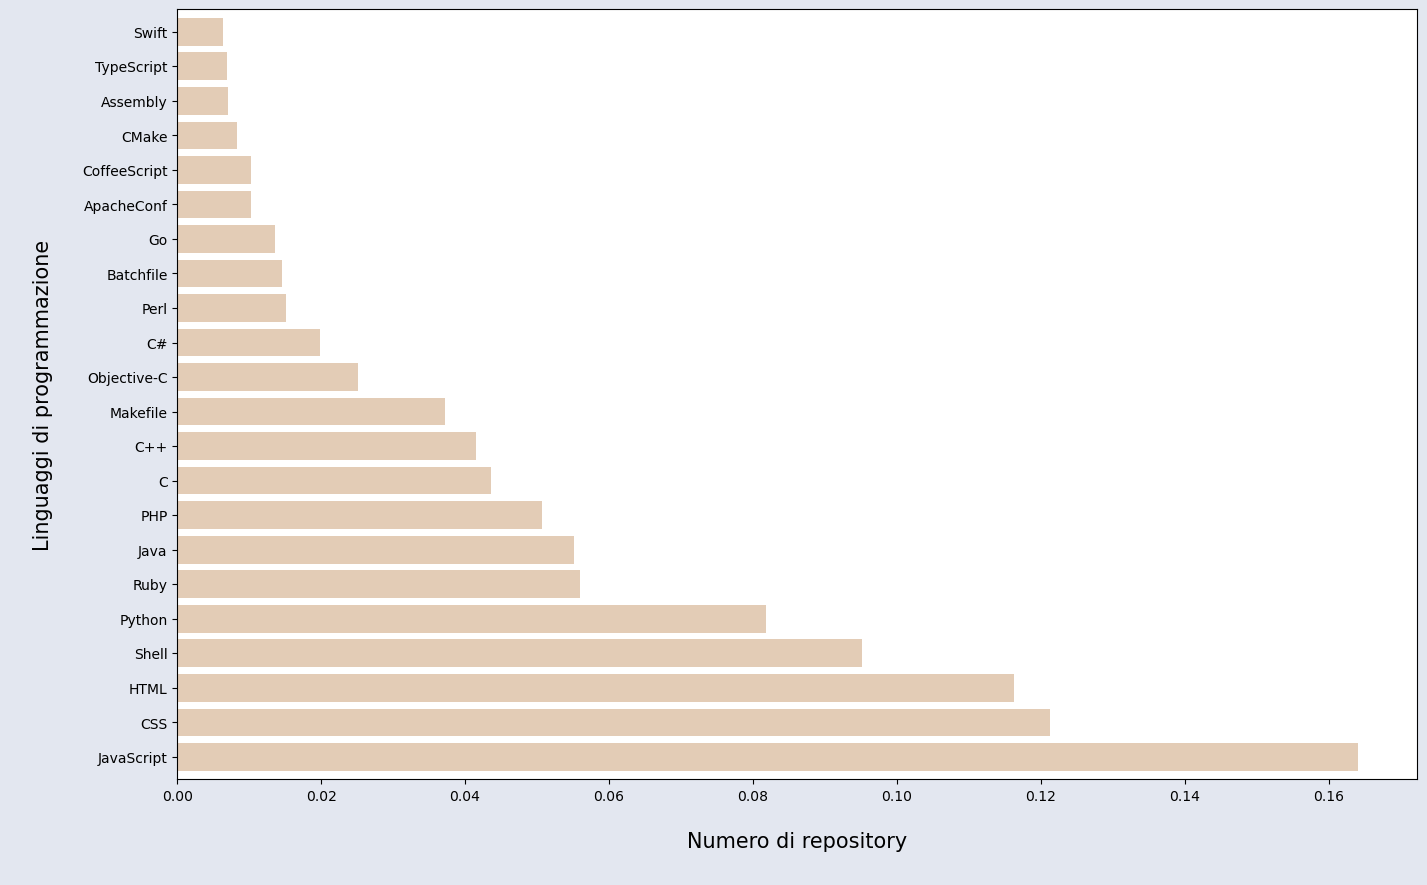

In [85]:
fig, ax = plt.subplots(figsize=(16, 10))
fig.set_facecolor('#E3E7F0')
r.plot.barh(ax = ax, legend = False, color = '#a4560f', alpha = 0.3, width = 0.8)
plt.ylabel('\nLinguaggi di programmazione\n', fontsize = 15)
plt.xlabel('\nNumero di repository\n', fontsize = 15)
plt.show()

In [29]:
data_t = df[df['type'] == 'pl'].sort_values(by='number_of_users',ascending=False).head(20)
data_t

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
5,cpp,C++,NaN,pl,1985,Bjarne Stroustrup,http://isocpp.org/,isocpp.org,2012.0,NaN,...,NaN,NaN,//,2022,4128238,61098,Bell Labs,0.0,text,NaN
2,c,C,NaN,pl,1972,Dennis Ritchie,NaN,NaN,NaN,http://www.c4learn.com/c-programming/c-keywords/,...,False,True,//,2022,3793768,59919,Bell Labs,0.0,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
10,matlab,MATLAB,NaN,pl,1984,Cleve Moler,http://mathworks.com/products/matlab,NaN,NaN,NaN,...,False,True,%,2022,2661579,32228,University of New Mexico,NaN,text,NaN
8,php,PHP,NaN,pl,1995,Rasmus Lerdorf,https://php.net,php.net,1997.0,http://php.net/manual/en/reserved.keywords.php,...,False,True,//,2022,2356101,30349,Zend,NaN,text,NaN
16,r,R,NaN,pl,1993,Ross Ihaka and Robert Gentleman,https://www.r-project.org,r-project.org,1999.0,NaN,...,False,True,#,2022,1075613,14173,University of Auckland,NaN,text,True
90,spss,SPSS,NaN,pl,1968,NaN,https://www.ibm.com/us-en/marketplace/spss-sta...,NaN,NaN,NaN,...,False,False,NaN,2022,965674,9587,NaN,0.0,text,NaN
26,arduino,Arduino Programming Language,The Arduino Programming Language is mostly C++...,pl,2005,NaN,https://www.arduino.cc,NaN,NaN,NaN,...,NaN,NaN,NaN,2022,527398,598,Arduino,0.0,NaN,NaN


In [30]:
c = data_t['title']
c

1                       JavaScript
0                             Java
5                              C++
2                                C
3                           Python
10                          MATLAB
8                              PHP
16                               R
90                            SPSS
26    Arduino Programming Language
18                              Go
9                             Perl
37                         Node.js
20                           Swift
31                             SAS
11                            Ruby
23                            Rust
12                              C#
30                      TypeScript
27                      PowerShell
Name: title, dtype: object

In [31]:
x = [i['num_repos'] for i in r if i.index in c]
r

,num_repos
language,
JavaScript,0.164124
CSS,0.121322
HTML,0.116267
Shell,0.095166
Python,0.081862
Ruby,0.055900
Java,0.055077
PHP,0.050695
C,0.043551


In [32]:
rs = pd.read_csv('C:/Users/saver/OneDrive/Desktop/project/SciVis/Dataset/repos.csv')
rs

,language,num_repos
0,JavaScript,1100421
1,CSS,813443
2,HTML,779549
3,Shell,638068
4,Python,548870
...,...,...
448,Beef,1
449,Org,1
450,Q#,1
451,Motoko,1


In [33]:
a = df[df['book_count'] > 400]
a['book_count']

0    401
Name: book_count, dtype: int64

In [34]:
a = df[df['book_count'] > 200]
a

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,features_has_semantic_indentation,features_has_line_comments,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source
0,java,Java,NaN,pl,1995,James Gosling,https://oracle.com/java/,NaN,NaN,NaN,...,False,True,//,2022,5550123,85206,Sun Microsystems,NaN,text,NaN
1,javascript,JavaScript,NaN,pl,1995,Brendan Eich,NaN,NaN,NaN,https://www.w3schools.com/js/js_reserved.asp,...,False,True,//,2022,5962666,63993,Netscape,NaN,text,NaN
3,python,Python,NaN,pl,1991,Guido van Rossum,https://www.python.org/,python.org,1995.0,https://www.programiz.com/python-programming/k...,...,True,True,#,2022,2818037,46976,Centrum Wiskunde & Informatica,NaN,text,NaN
8,php,PHP,NaN,pl,1995,Rasmus Lerdorf,https://php.net,php.net,1997.0,http://php.net/manual/en/reserved.keywords.php,...,False,True,//,2022,2356101,30349,Zend,NaN,text,NaN
9,perl,Perl,NaN,pl,1987,Larry Wall,https://www.perl.org,perl.org,1995.0,NaN,...,False,True,#,2022,491984,13482,Unisys,NaN,text,NaN
14,fortran,Fortran,NaN,pl,1957,John Backus,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Fortran_95_langu...,...,False,True,!,2022,165151,1931,IBM,0.0,text,NaN
22,cobol,COBOL,NaN,pl,1959,Howard Bromberg and Norman Discount and Vernon...,NaN,NaN,NaN,NaN,...,False,True,*>,2022,187188,2616,Conference/Committee on Data Systems Languages,0.0,text,NaN
26,arduino,Arduino Programming Language,The Arduino Programming Language is mostly C++...,pl,2005,NaN,https://www.arduino.cc,NaN,NaN,NaN,...,NaN,NaN,NaN,2022,527398,598,Arduino,0.0,NaN,NaN
54,vba,VBA,NaN,pl,1993,NaN,NaN,NaN,NaN,NaN,...,NaN,True,',2022,3650,511,Microsoft,0.0,text,NaN


In [35]:
com = pd.crosstab(index = df['features_has_line_comments'],
                  columns = ['freq'],
                  colnames = [''])
com

,freq
features_has_line_comments,
False,21
True,517


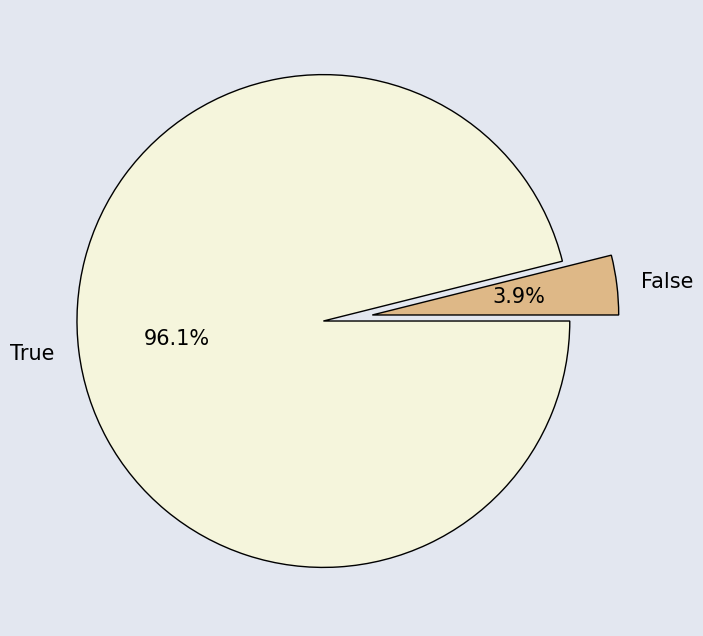

In [36]:
color = ['burlywood','beige']
fig, ax = plt.subplots(figsize=(18, 8))
fig.set_facecolor('#E3E7F0')
plt.pie(com.freq, labels = com.index, autopct='%1.1f%%',explode=[0.1,0.1],textprops={'fontsize':15,'color':'black'}, colors = color,wedgeprops={'linewidth':1,'edgecolor':'k'} )

plt.show()

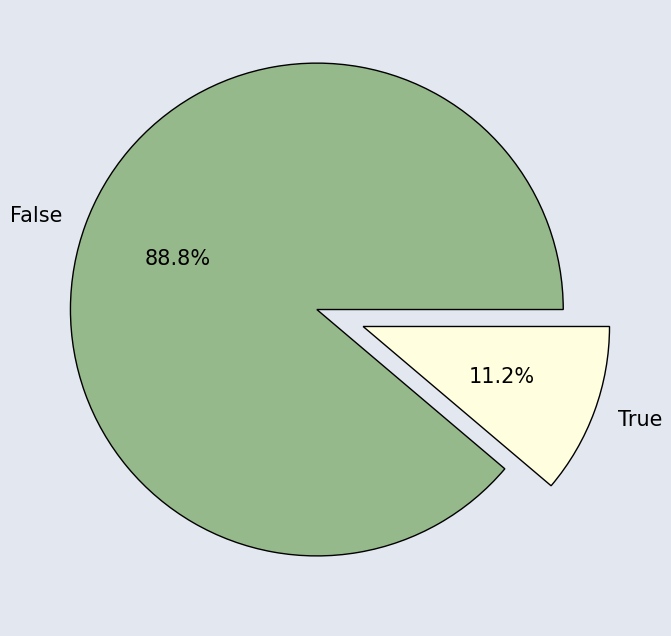

In [37]:
color = ['#96b98b', 'lightyellow']
fig, ax = plt.subplots(figsize=(18, 8))
fig.set_facecolor('#E3E7F0')
plt.pie(ind.freq, labels = ind.index, autopct='%1.1f%%',explode=[0.1,0.1], textprops={'fontsize':15,'color':'black'},colors = color,wedgeprops={'linewidth':1,'edgecolor':'k'} )
#plt.title("L'indentazione ha valore semantico?")
plt.show()

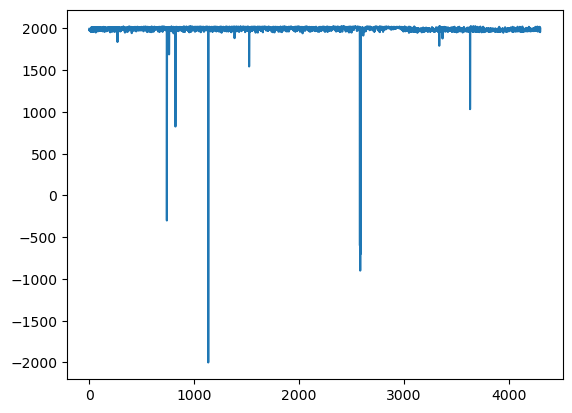

In [38]:
plt.plot(df['appeared'])
plt.show()

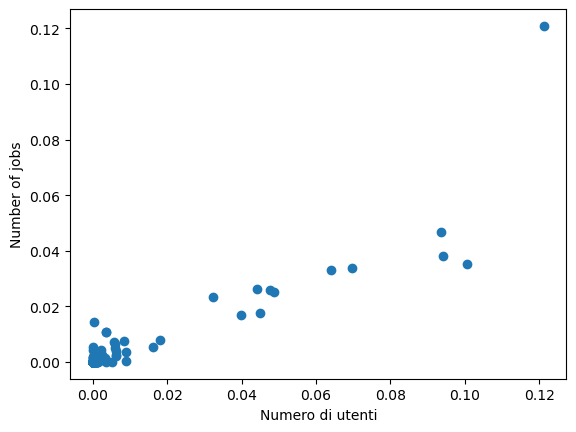

In [39]:
df['jobs'] = df['number_of_jobs']/df['number_of_jobs'].sum()
df = df[df['jobs'] < 0.375]
df['users'] = df['number_of_users']/df['number_of_users'].sum()
plt.scatter(df['users'],df['jobs'])
plt.xlabel('Numero di utenti')
plt.ylabel('Number of jobs')
plt.show()

In [40]:
d = df[df['jobs'] > 0.375]
d

,pldb_id,title,description,type,appeared,creators,website,domain_name,domain_name_registered,reference,...,line_comment_token,last_activity,number_of_users,number_of_jobs,origin_community,central_package_repository_count,file_type,is_open_source,jobs,users


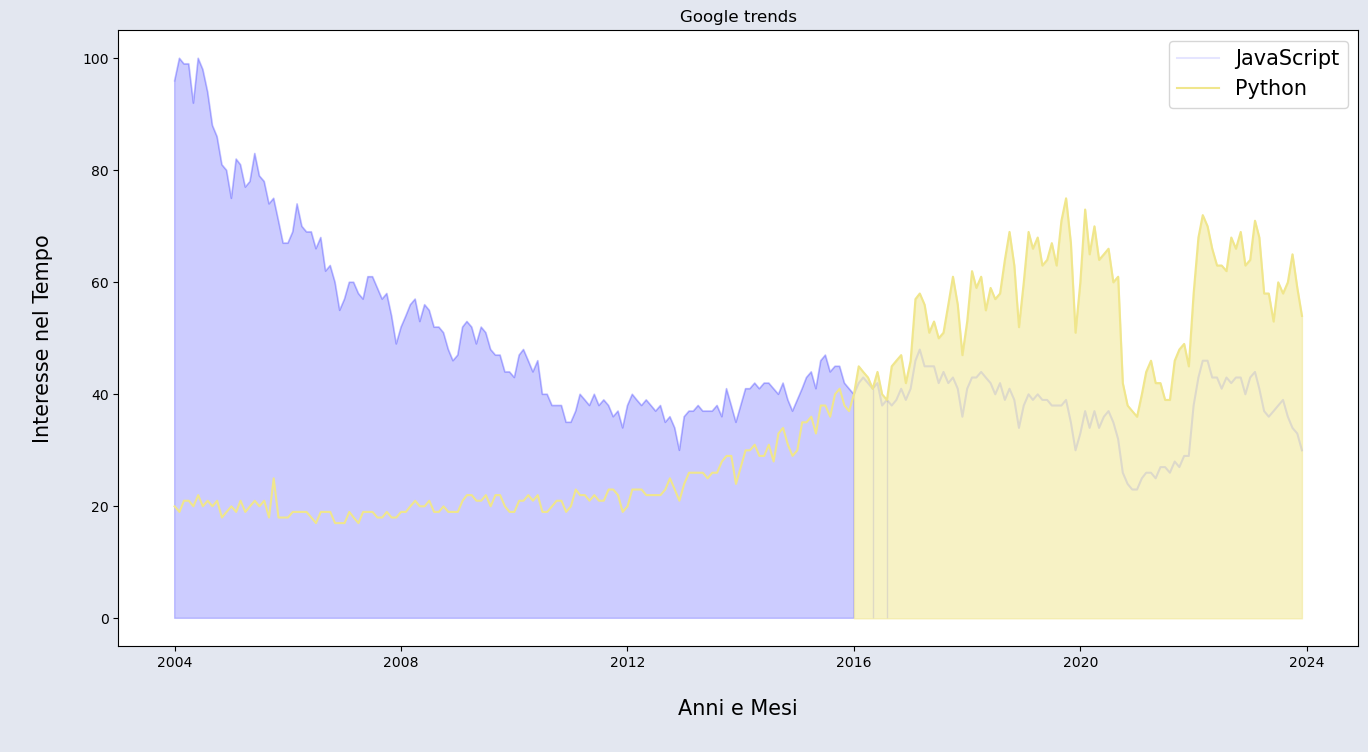

In [61]:

pyVSjs = pd.read_csv('C:/Users/saver/OneDrive/Desktop/project/SciVis/Dataset/PyvsJs.csv')
python_values = pyVSjs['Python']
js_values = pyVSjs['JavaScript']
years, months = zip(*(date.split('-') for date in pyVSjs['Mese']))
years = [int(year) for year in years]
months = [int(month) for month in months]

py_mean = python_values.groupby([years, months]).mean()
js_mean = js_values.groupby([years, months]).mean()

js_mean.index = pd.to_datetime(['{}-{}'.format(year, month) for year, month in js_mean.index])

py_mean_values = py_mean.values
js_mean_values = js_mean.values

fig = plt.figure(figsize=(16, 8))
fig.set_facecolor('#e3e7f0')
plt.plot(js_mean.index, js_mean_values, color='b', label='JavaScript', alpha = 0.1)
plt.plot(js_mean.index, py_mean_values, color='khaki', label='Python')

mask = js_mean_values >= py_mean_values
mask2 = js_mean_values <= py_mean_values

plt.fill_between(js_mean.index, js_mean_values, where=(js_mean_values >= py_mean_values), color='blue', alpha =  0.2)
plt.fill_between(js_mean.index, py_mean_values, where=(py_mean_values >= js_mean_values), color='khaki', alpha =  0.5)

plt.legend(fontsize=15)
plt.title('Google trends')
plt.xlabel('\nAnni e Mesi\n', fontsize=15)
plt.ylabel('\nInteresse nel Tempo\n', fontsize=15)

# Mostra il grafico
plt.show()


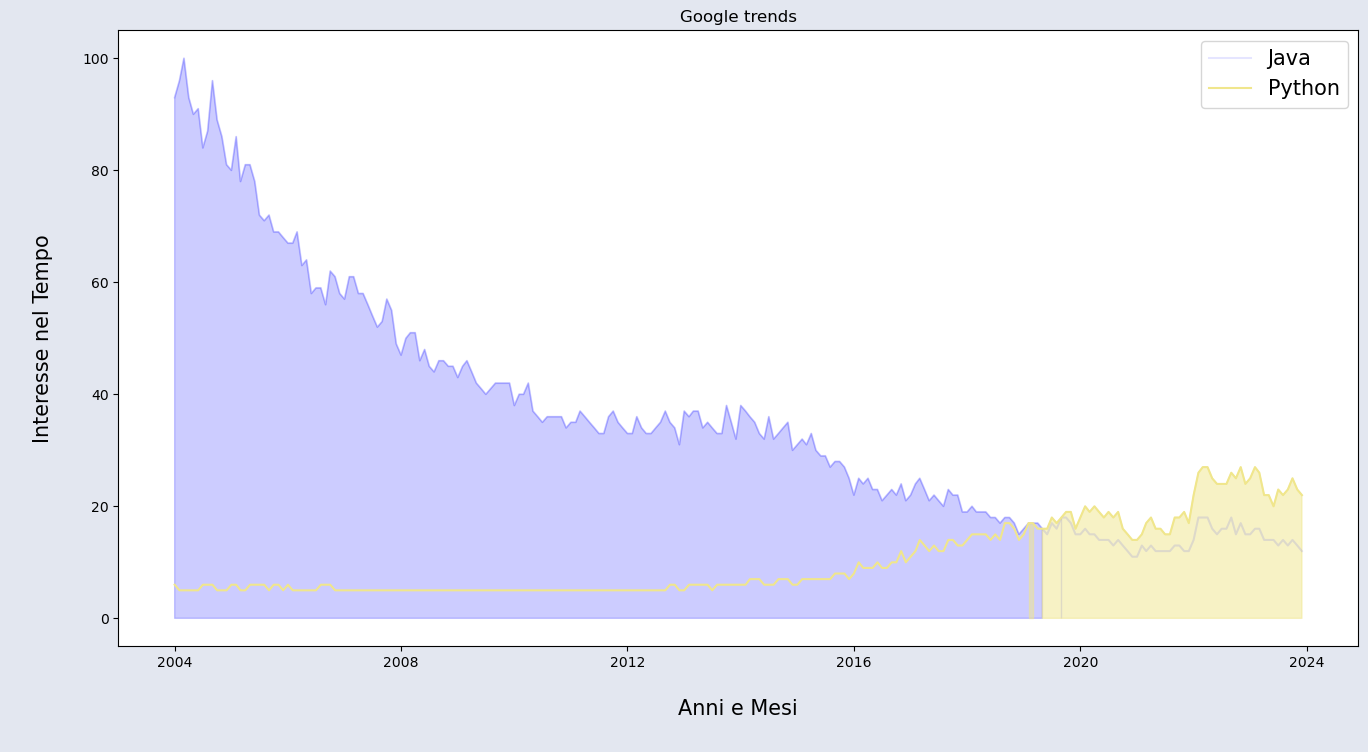

In [75]:

data = pd.read_csv('C:/Users/saver/OneDrive/Desktop/project/SciVis/Dataset/PyvsJava.csv')
python_values = data['Python']
java_values = data['Java']
years, months = zip(*(date.split('-') for date in data['Mese']))
years = [int(year) for year in years]
months = [int(month) for month in months]

py_mean = python_values.groupby([years, months]).mean()
java_mean = java_values.groupby([years, months]).mean()

java_mean.index = pd.to_datetime(['{}-{}'.format(year, month) for year, month in java_mean.index])

py_mean_values = py_mean.values
java_mean_values = java_mean.values

fig = plt.figure(figsize=(16, 8))
fig.set_facecolor('#e3e7f0')
plt.plot(java_mean.index, java_mean_values, color='b', label='Java', alpha = 0.1)
plt.plot(java_mean.index, py_mean_values, color='khaki', label='Python')

mask = java_mean_values > py_mean_values
mask2 = java_mean_values <= py_mean_values

plt.fill_between(java_mean.index, java_mean_values, where=(java_mean_values >= py_mean_values), color='blue', alpha =  0.2)
plt.fill_between(java_mean.index, py_mean_values, where=(py_mean_values >= java_mean_values), color='khaki', alpha =  0.5)

plt.legend(fontsize=15)
plt.title('Google trends')
plt.xlabel('\nAnni e Mesi\n', fontsize=15)
plt.ylabel('\nInteresse nel Tempo\n', fontsize=15)
#plt.grid(axis = 'y')

# Mostra il grafico
plt.show()
